# About the Dataset

This notebook uses a simulated dataset designed to explore how various lifestyle habits impact academic performance among students. The dataset contains 1,000 synthetic student records and over 15 features, including:

- Study hours
- Sleep patterns
- Social media usage
- Diet quality
- Mental health
- Final exam scores

Created with realistic patterns for educational practice, this dataset is ideal for:
- Machine learning projects
- Regression analysis
- Clustering
- Data visualization

Ever wondered how much Netflix, sleep, or TikTok scrolling affects your grades? 👀 This dataset simulates students' daily habits and compares them to academic outcomes. It's perfect for exploratory data analysis, ML practice, or just exploring the connections between lifestyle and GPA.

## Load and Preview Dataset

In this section, we load the CSV data using `pandas`, inspect the structure, and get a feel for what kind of variables we’re dealing with. This step helps determine appropriate preprocessing, analysis, and modeling strategies.


In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("student_habits_performance.csv")
print("Shape:", df.shape)
print("\nData types:\n", df.dtypes)
df.head()

Shape: (1000, 16)

Data types:
 student_id                        object
age                                int64
gender                            object
study_hours_per_day              float64
social_media_hours               float64
netflix_hours                    float64
part_time_job                     object
attendance_percentage            float64
sleep_hours                      float64
diet_quality                      object
exercise_frequency                 int64
parental_education_level          object
internet_quality                  object
mental_health_rating               int64
extracurricular_participation     object
exam_score                       float64
dtype: object


,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


## Encode Categorical Variables

This step converts categorical features into numerical representations using techniques like one-hot encoding or label encoding, preparing the data for analysis and modeling.


In [55]:
categorical_cols = [
    "gender", "part_time_job", "diet_quality", 
    "parental_education_level", "internet_quality", 
    "extracurricular_participation"
]
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

df_encoded.head()


,student_id,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score,gender_Male,gender_Other,part_time_job_Yes,diet_quality_Good,diet_quality_Poor,parental_education_level_High School,parental_education_level_Master,internet_quality_Good,internet_quality_Poor,extracurricular_participation_Yes
0,S1000,23,0.0,1.2,1.1,85.0,8.0,6,8,56.2,False,False,False,False,False,False,True,False,False,True
1,S1001,20,6.9,2.8,2.3,97.3,4.6,6,8,100.0,False,False,False,True,False,True,False,False,False,False
2,S1002,21,1.4,3.1,1.3,94.8,8.0,1,1,34.3,True,False,False,False,True,True,False,False,True,False
3,S1003,23,1.0,3.9,1.0,71.0,9.2,4,1,26.8,False,False,False,False,True,False,True,True,False,True
4,S1004,19,5.0,4.4,0.5,90.9,4.9,3,1,66.4,False,False,False,False,False,False,True,True,False,False


## Visualize Distributions of Habits and Performance

Here, we visualize how variables like study hours, sleep hours, and social media use are distributed among students to identify outliers and general behavior trends.


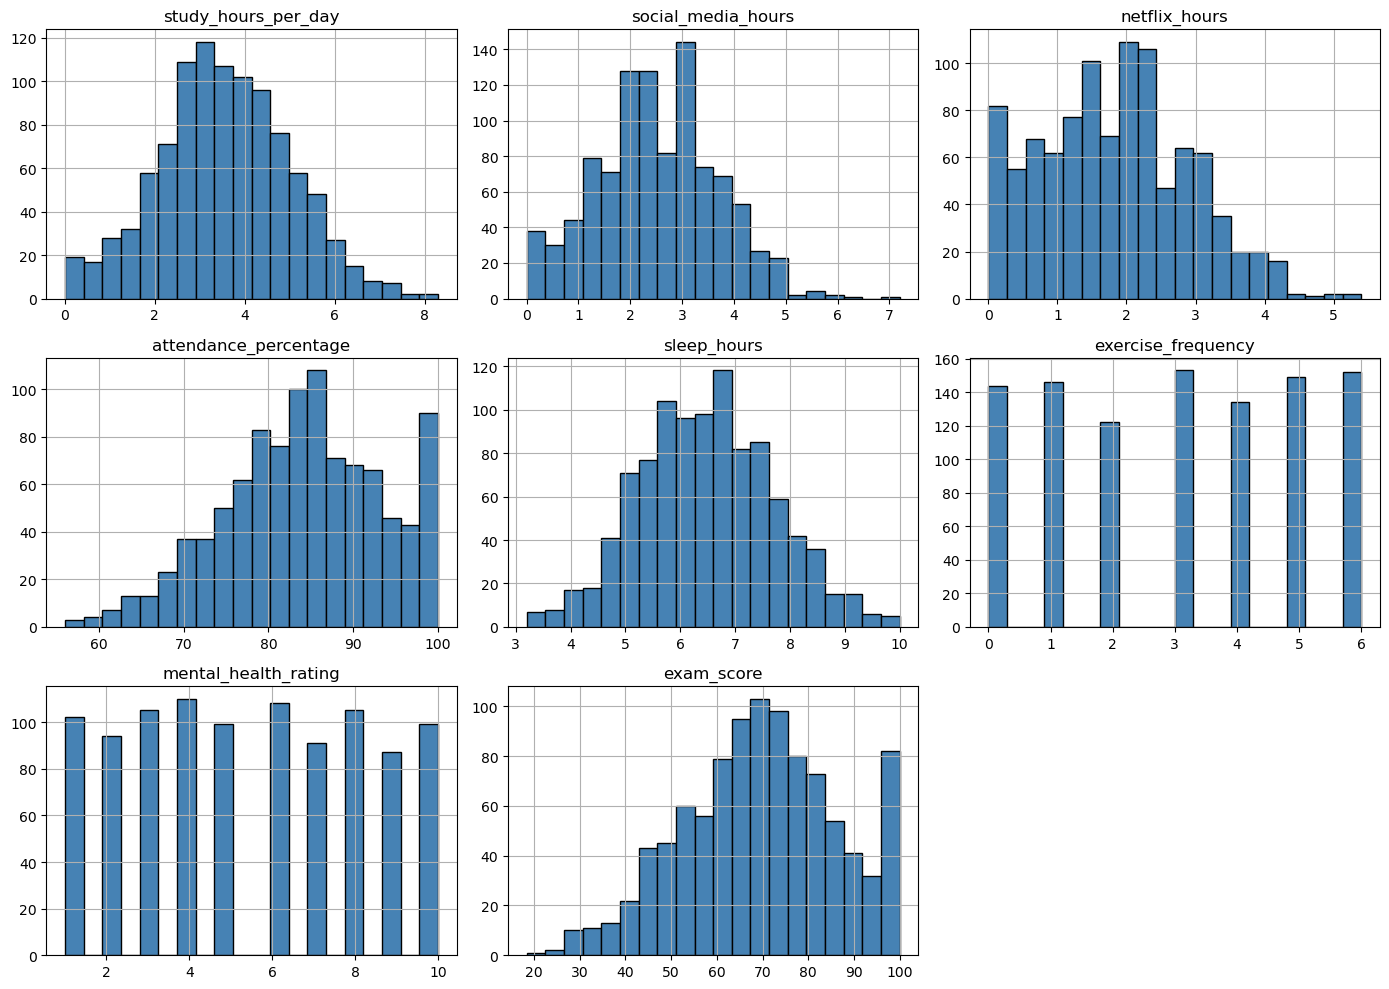

In [56]:
continuous_vars = ['study_hours_per_day', 'social_media_hours', 'netflix_hours',
                   'attendance_percentage', 'sleep_hours', 'exercise_frequency',
                   'mental_health_rating', 'exam_score']

df[continuous_vars].hist(figsize=(14, 10), bins=20, color='steelblue', edgecolor='black')
plt.tight_layout()
plt.show()


## Correlation Analysis

This block computes correlations between numeric variables and visualizes them using a heatmap to identify potentially influential variables on exam performance.


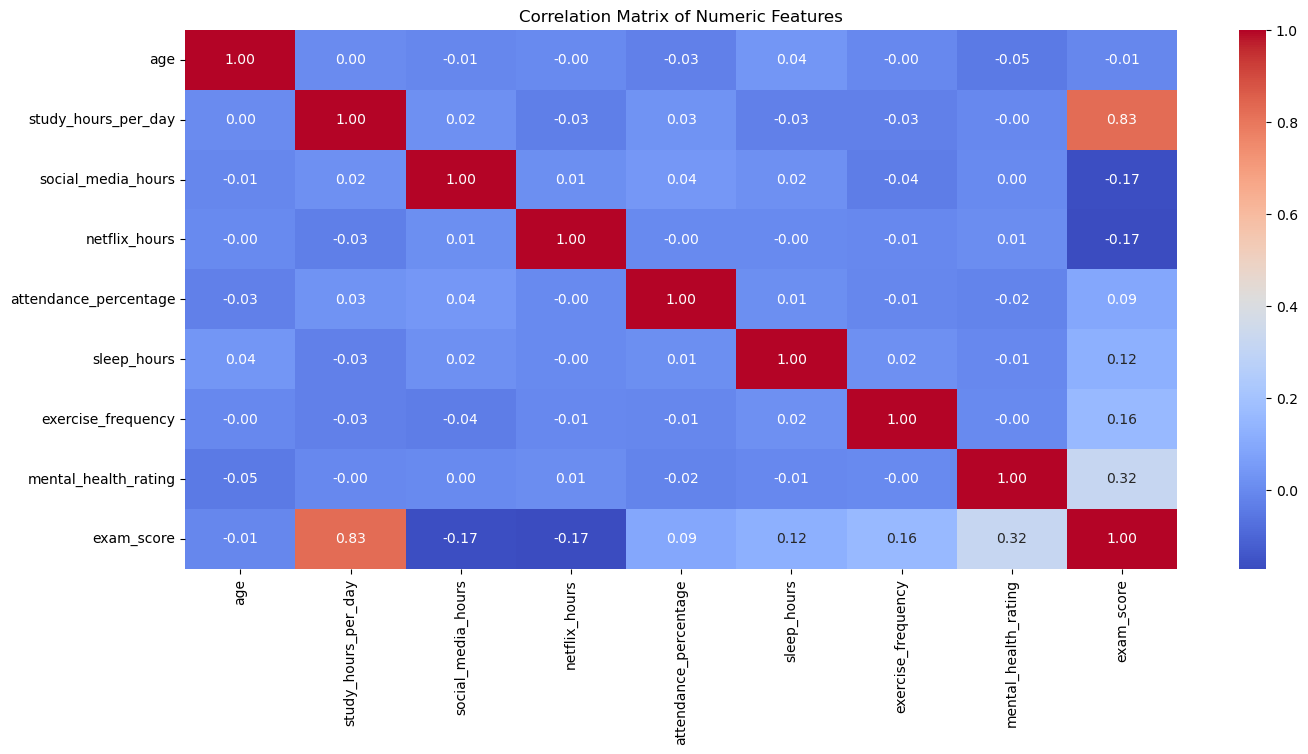

In [57]:
import seaborn as sns

corr = df.corr(numeric_only=True)

plt.figure(figsize=(16, 7))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Correlation Matrix of Numeric Features")
plt.show()


## Outlier Detection and Cleaning

In this step, we inspect the dataset for extreme or potentially invalid values in continuous variables. We use the IQR (Interquartile Range) which basically means the middle 50% stretch that is a method to identify outliers and remove them to reduce noise and improve the reliability of future analysis and modeling.

In [58]:
continuous_cols = [
    'study_hours_per_day', 'social_media_hours', 'netflix_hours',
    'attendance_percentage', 'sleep_hours', 'exercise_frequency',
    'mental_health_rating', 'exam_score'
]

df_cleaned = df.copy()

for col in continuous_cols:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    before = df_cleaned.shape[0]
    df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
    after = df_cleaned.shape[0]

    print(f"{col}: Remove {before - after} outliers")

print("\ncleaned dataset shape:", df_cleaned.shape)

study_hours_per_day: Remove 7 outliers
social_media_hours: Remove 5 outliers
netflix_hours: Remove 4 outliers
attendance_percentage: Remove 3 outliers
sleep_hours: Remove 2 outliers
exercise_frequency: Remove 0 outliers
mental_health_rating: Remove 0 outliers
exam_score: Remove 2 outliers

cleaned dataset shape: (977, 16)


## Clustering Students by Lifestyle Habits Using The Cleaned Data

In this step, we apply unsupervised learning (KMeans) to group students into behavioral clusters based on their daily habits. This helps reveal patterns like “high-effort students,” “low-sleep high-social group,” etc. We then visualize the clusters using PCA (principal component analysis) to reduce dimensions for plotting.


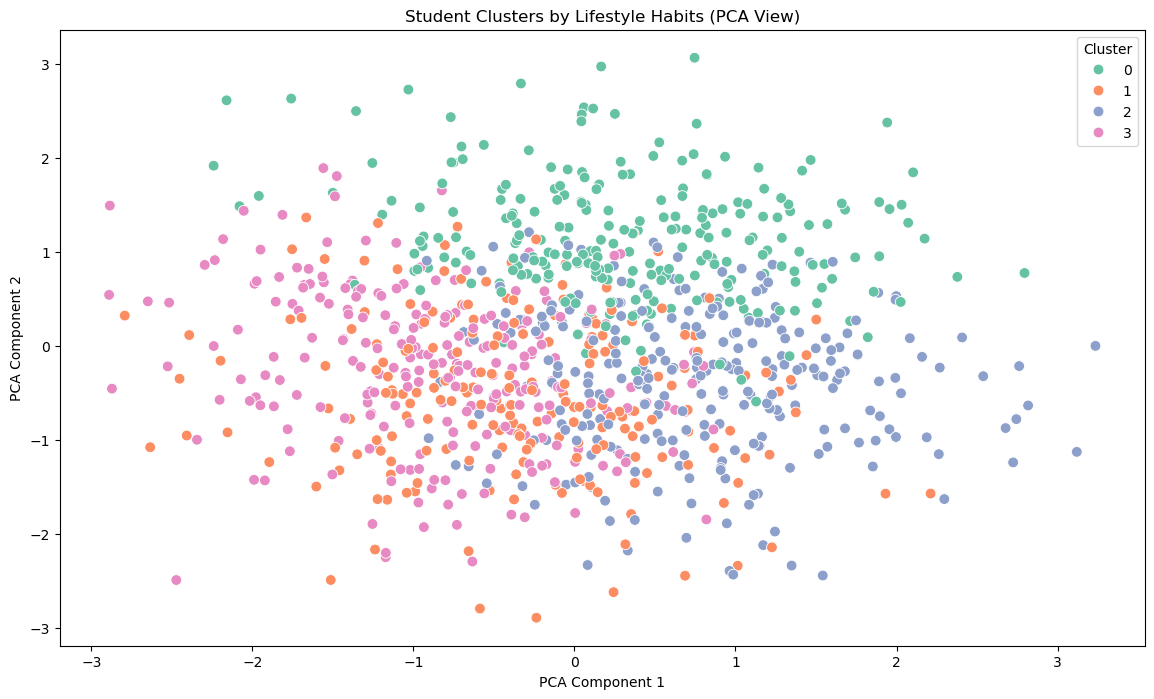

In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

features_for_clustering = [
    'study_hours_per_day', 'social_media_hours', 'netflix_hours',
    'attendance_percentage', 'sleep_hours', 'exercise_frequency',
    'mental_health_rating'
]

df_cluster = df_cleaned[features_for_clustering].dropna()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

df_clustered = df_cleaned.loc[df_cluster.index].copy()
df_clustered["cluster"] = clusters

#because we wanna show in 2d we have to use pca and i dont know how it works
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_clustered["PCA1"] = X_pca[:, 0]
df_clustered["PCA2"] = X_pca[:, 1]

plt.figure(figsize=(14, 8))
sns.scatterplot(data=df_clustered, x="PCA1", y="PCA2", hue="cluster", palette="Set2", s=60)
plt.title("Student Clusters by Lifestyle Habits (PCA View)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()



##  Analyze Average Exam Score Per Cluster

Now that we’ve cllasified students into clusters, we calculate the average exam score within each group to understand how different lifestyles relate to academic performance.


In [60]:
cluster_perf = df_clustered.groupby("cluster")["exam_score"].mean().sort_values(ascending=False)
print("Average Exam Score per Cluster:")
print(cluster_perf)

cluster_profile = df_clustered.groupby("cluster")[features_for_clustering + ["exam_score"]].mean().round(2)
cluster_profile


Average Exam Score per Cluster:
cluster
1    79.042995
0    72.873092
2    66.950186
3    60.952778
Name: exam_score, dtype: float64


,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
cluster,,,,,,,,
0,3.82,3.01,2.28,83.28,6.24,1.96,8.05,72.87
1,3.58,1.54,0.97,86.84,6.57,3.84,7.03,79.04
2,3.98,2.52,1.57,85.13,6.47,1.70,2.76,66.95
3,2.71,2.68,2.26,81.66,6.60,4.89,4.42,60.95


###  لیبل گزاری هر کلاستر با بررسی میانگین مقدار رفتار ها بدست می آید 

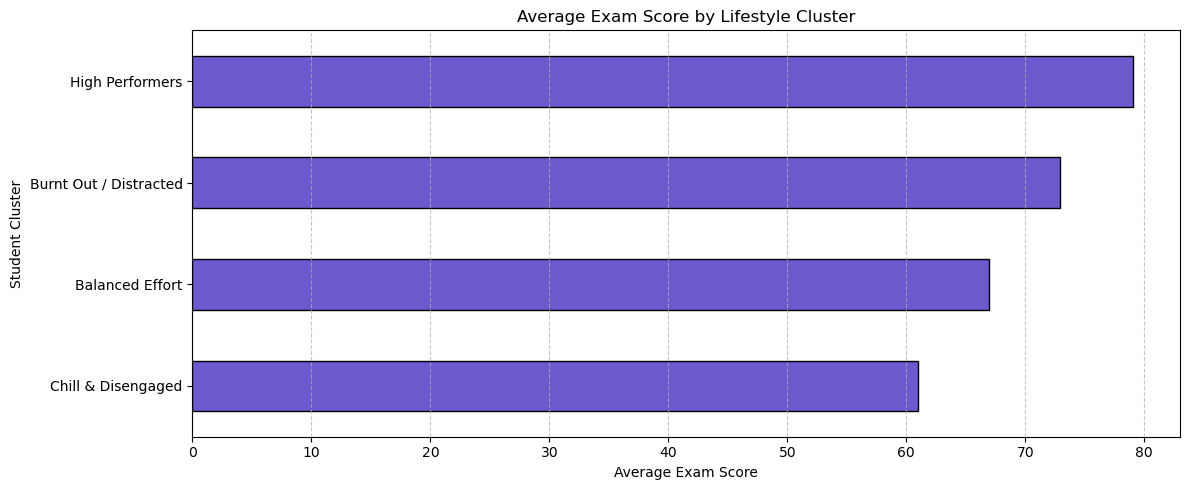

In [61]:
label_map = {
    0: "Burnt Out / Distracted",
    1: "High Performers",
    2: "Balanced Effort",
    3: "Chill & Disengaged"
}
df_clustered["cluster_label"] = df_clustered["cluster"].map(label_map)

# Calculate mean exam score per labeled cluster
label_avg_scores = (
    df_clustered.groupby("cluster_label")["exam_score"]
    .mean()
    .sort_values()
)

# Plot horizontal bar chart
plt.figure(figsize=(12, 5))
label_avg_scores.plot(kind="barh", color="slateblue", edgecolor="black")
plt.xlabel("Average Exam Score")
plt.ylabel("Student Cluster")
plt.title("Average Exam Score by Lifestyle Cluster")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Top 3 Positive Behavioral Predictors of Exam Score:
study_hours_per_day     9.588193
mental_health_rating    2.005667
sleep_hours             1.874498
dtype: float64


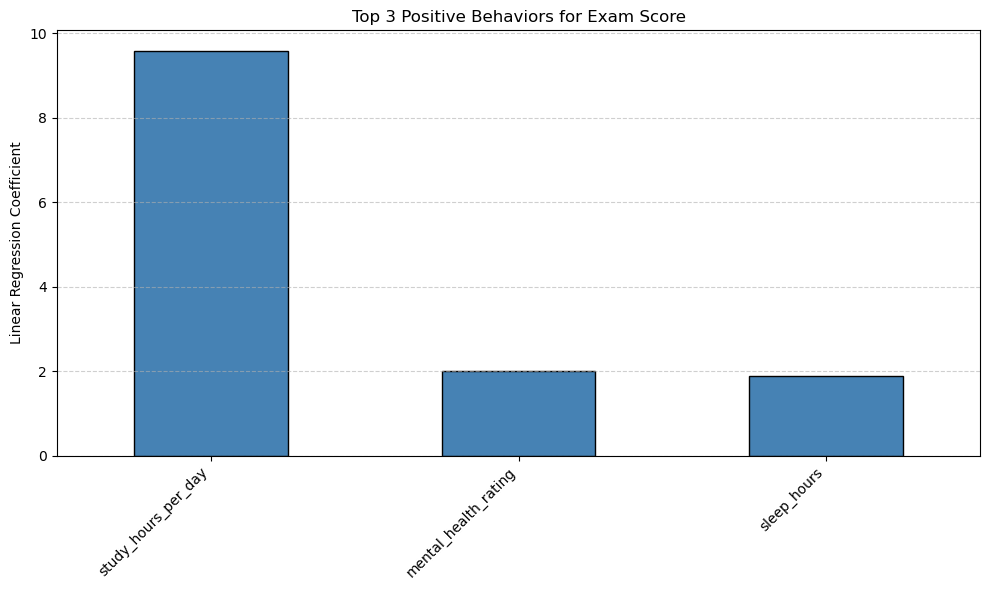

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

features = [
    'study_hours_per_day', 'social_media_hours', 'netflix_hours',
    'attendance_percentage', 'sleep_hours', 'exercise_frequency',
    'mental_health_rating'
]

X = df_clustered[features]
y = df_clustered['exam_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

coefs = pd.Series(lr.coef_, index=features).sort_values(ascending=False)

top_3_positive = coefs.head(3)
print("Top 3 Positive Behavioral Predictors of Exam Score:")
print(top_3_positive)

plt.figure(figsize=(10, 6))
top_3_positive.plot(kind="bar", color="steelblue", edgecolor="black")
plt.title("Top 3 Positive Behaviors for Exam Score")
plt.ylabel("Linear Regression Coefficient")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
